In [163]:
import gzip
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from haversine import haversine, Unit
display.max_columns = 1000
from ast import literal_eval
from datetime import datetime

import geopandas as gpd
from geopandas import GeoSeries
from geopandas import GeoDataFrame

# Upper Collegetown: '361090002001'
# Lower Collegetown: '361090002002'
# Even Lower Collegetown: '361090002003'

# 2019 Data
# Fall Break, 10/12 - 10/15
# Thanksgiving Break 11/27 - 12/01


# 2020 Data
# No Fall Break
# Veterans Day 11/11
# Thanskgiving 11/25 - onward


In [164]:
collegetown2019 = pd.read_csv('collegetown2019.csv')
collegetown2020 = pd.read_csv('collegetown2020.csv')
centers = pd.read_csv('cbg_geos_centers.csv')
cbg_shapes = gpd.read_file('CBG_GEOS.csv')

In [165]:
collegetown2019['date'] = pd.to_datetime(collegetown2019['date_range_start'])
collegetown2019['date'] = [i.date() for i in collegetown2019['date'].values]
collegetown2019['max_at_home'] = [max(literal_eval(i)) for i in collegetown2019['at_home_by_each_hour'].values]
collegetown2019['destination_cbgs'] = [literal_eval(i) for i in collegetown2019['destination_cbgs'].values]

collegetown2020['date'] = pd.to_datetime(collegetown2020['date_range_start'])
collegetown2020['date'] = [i.date() for i in collegetown2020['date'].values]
collegetown2020['max_at_home'] = [max(literal_eval(i)) for i in collegetown2020['at_home_by_each_hour'].values]
collegetown2020['destination_cbgs'] = [literal_eval(i) for i in collegetown2020['destination_cbgs'].values]

centers['CensusBlockGroup'] = centers['CensusBlockGroup'].astype(str).str.zfill(12)
cbg_shapes['CensusBlockGroup'] = cbg_shapes['CensusBlockGroup'].astype(str).str.zfill(12)

In [185]:
df2019 = collegetown2019[collegetown2019['origin_census_block_group'] == 361090002001]
trip_dict2019 = {}
out_of_state_list = []
out_of_county_list = []
for i,row in df2019.iterrows():
    dict1 = row['destination_cbgs']
    df = pd.DataFrame()
    df['CensusBlockGroup'] = dict1.keys()
    df['values'] = dict1.values()
    df = pd.merge(df,centers[['CensusBlockGroup','State','County']], on = 'CensusBlockGroup')
    df_county = df.groupby(['State','County']).sum().reset_index()
    df_state = df.groupby('State').sum().reset_index()
    oos = df_state[df_state['State'] != 'NY']['values'].sum()
    ooc = df_county[df_county['County'] != 'Tompkins County']['values'].sum()
    out_of_state_list.append(oos)
    out_of_county_list.append(ooc)
    trip_dict2019[row['date']] = df
df2019['out_of_state_trips'] = out_of_state_list
df2019['out_of_county_trips'] = out_of_county_list

df2020 = collegetown2020[collegetown2020['origin_census_block_group'] == 361090002001]
trip_dict2020 = {}
out_of_state_list = []
out_of_county_list = []
for i,row in df2020.iterrows():
    dict1 = row['destination_cbgs']
    df = pd.DataFrame()
    df['CensusBlockGroup'] = dict1.keys()
    df['values'] = dict1.values()
    df = pd.merge(df,centers[['CensusBlockGroup','State','County']], on = 'CensusBlockGroup')
    df_county = df.groupby(['State','County']).sum().reset_index()
    df_state = df.groupby('State').sum().reset_index()
    oos = df_state[df_state['State'] != 'NY']['values'].sum()
    ooc = df_county[df_county['County'] != 'Tompkins County']['values'].sum()
    out_of_state_list.append(oos)
    out_of_county_list.append(ooc)
    trip_dict2020[row['date']] = df
df2020['out_of_state_trips'] = out_of_state_list
df2020['out_of_county_trips'] = out_of_county_list

<ipython-input-185-ef720a42f045>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['out_of_state_trips'] = out_of_state_list
<ipython-input-185-ef720a42f045>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['out_of_county_trips'] = out_of_county_list
<ipython-input-185-ef720a42f045>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Text(0.5, 1.0, '2020 Collegetown Max Number of Device Out-of-State Per Day')

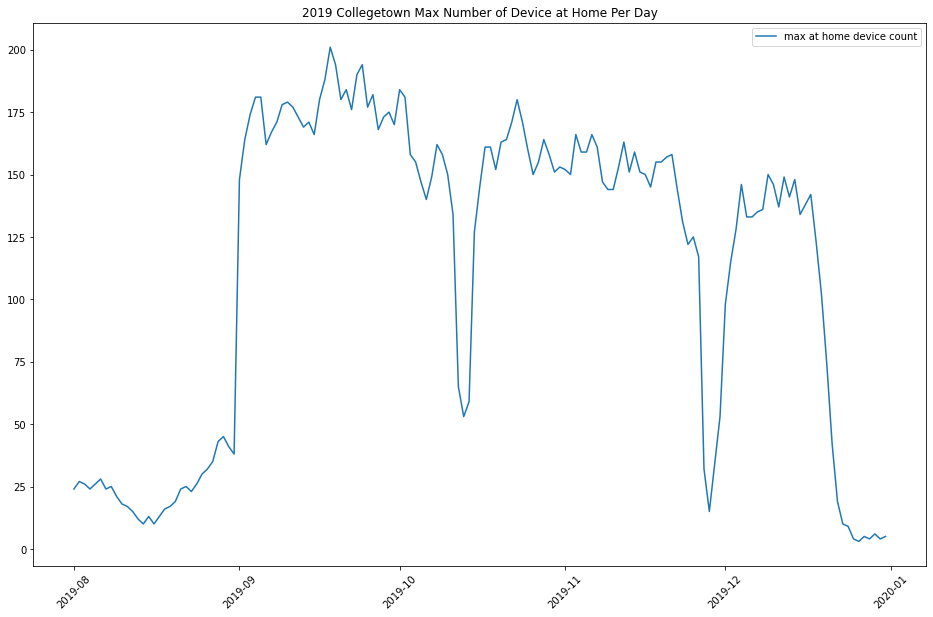

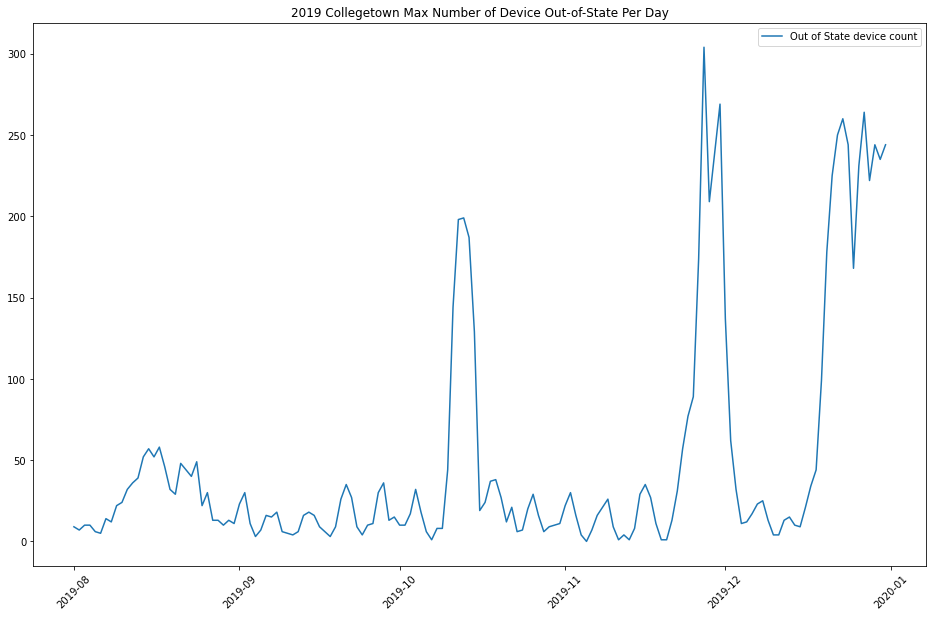

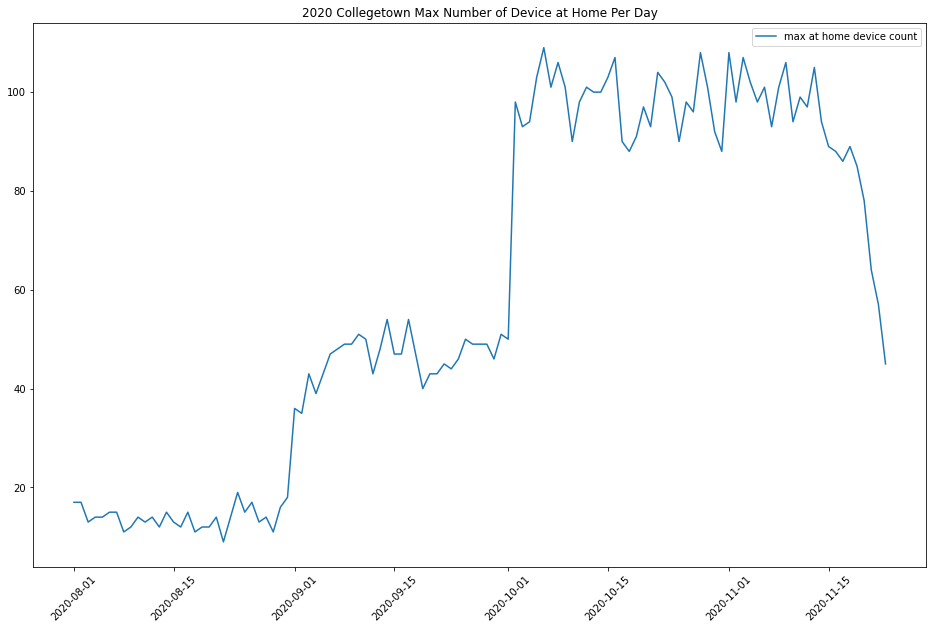

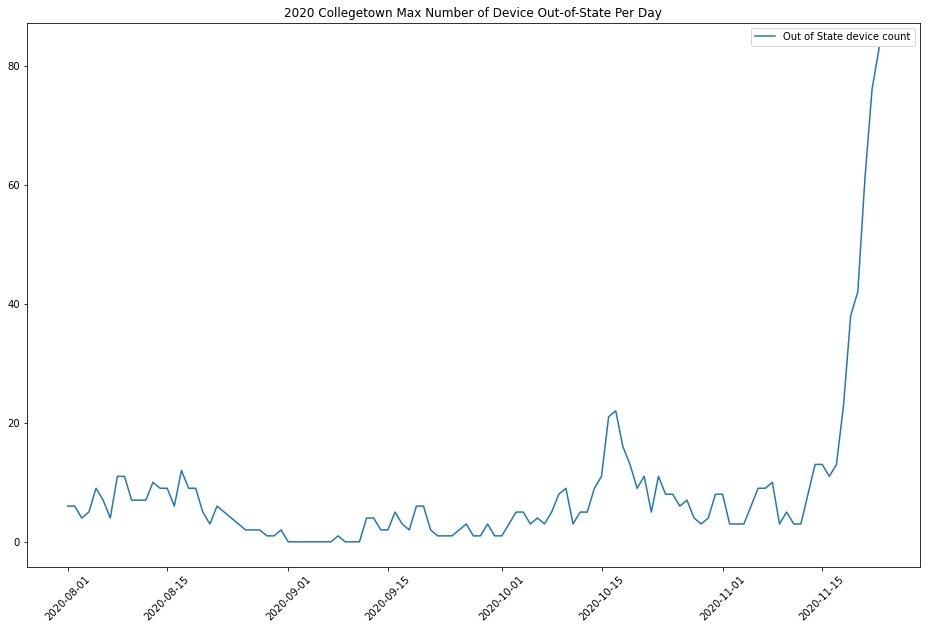

In [186]:
plt.figure(figsize = (16,10))
#plt.plot(temp['date'],temp['device_count'],label = 'device count')
#plt.plot(temp['date'],temp['candidate_device_count'], label = 'candidate device count')
plt.plot(df2019['date'],df2019['max_at_home'], label = 'max at home device count')
plt.xticks(rotation=45) 
plt.legend()
plt.title('2019 Collegetown Max Number of Device at Home Per Day')

plt.figure(figsize = (16,10))
plt.plot(df2019['date'],df2019['out_of_state_trips'], label = 'Out of State device count')
plt.xticks(rotation=45) 
plt.legend()
plt.title('2019 Collegetown Max Number of Device Out-of-State Per Day')

plt.figure(figsize = (16,10))
plt.plot(df2020['date'],df2020['max_at_home'], label = 'max at home device count')
plt.xticks(rotation=45) 
plt.legend()
plt.title('2020 Collegetown Max Number of Device at Home Per Day')

plt.figure(figsize = (16,10))
plt.plot(df2020['date'],df2020['out_of_state_trips'], label = 'Out of State device count')
plt.xticks(rotation=45) 
plt.legend()
plt.title('2020 Collegetown Max Number of Device Out-of-State Per Day')

Text(0.5, 1.0, ' Number of Collegetown Home Devices Seen Out-of-County Per Day')

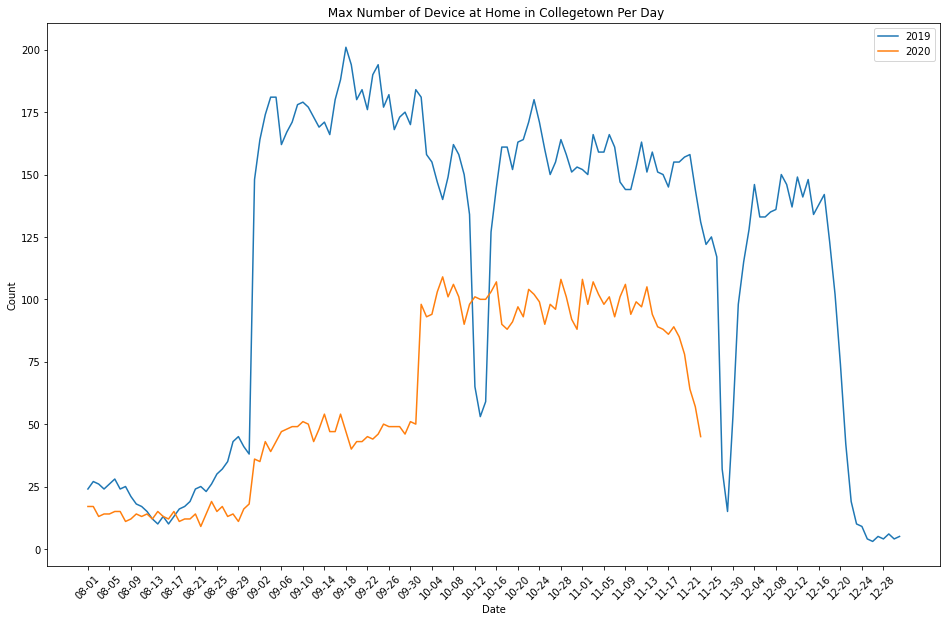

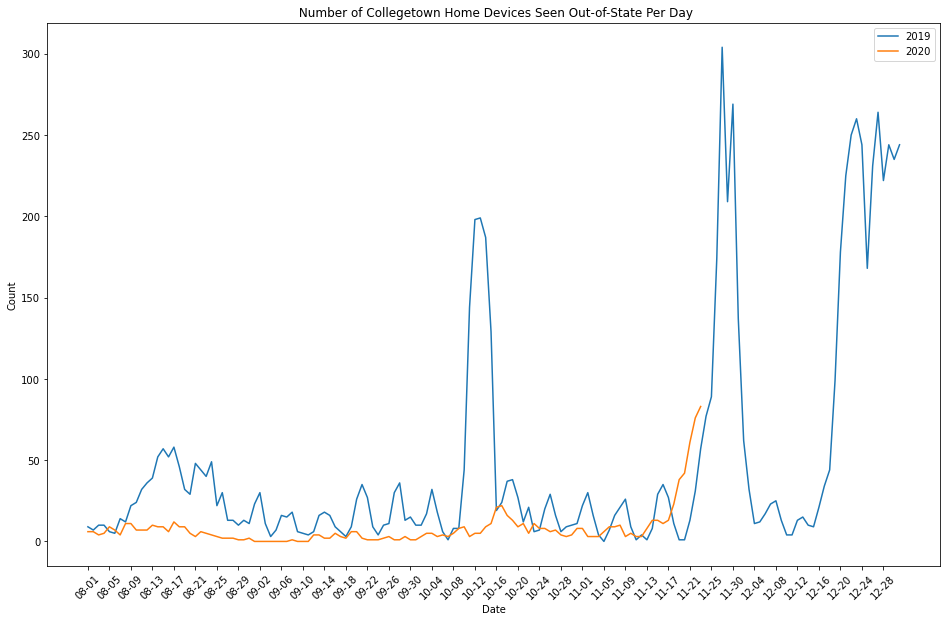

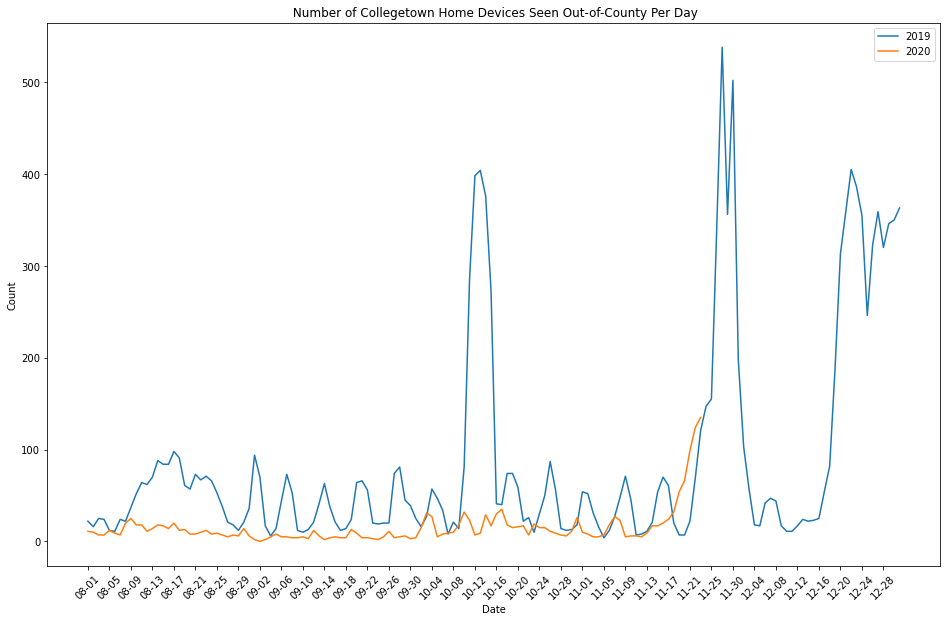

In [188]:
plt.figure(figsize = (16,10))
#plt.plot(temp['date'],temp['device_count'],label = 'device count')
#plt.plot(temp['date'],temp['candidate_device_count'], label = 'candidate device count')
plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d'),df2019['max_at_home'], label = '2019')
plt.title('Collegetown Max Number of Device at Home Per Day')


plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').iloc[0:len(df2020)],df2020['max_at_home'], label = '2020')
plt.xticks(rotation=45) 
plt.xticks(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').values[::4])

#thanksgiving_2019 = pd.to_datetime(df2019['date']).dt.strftime('%m-%d').iloc[118]
#thanksgiving_2020 = pd.to_datetime(df2019['date']).dt.strftime('%m-%d').iloc[116]
#plt.vlines(thanksgiving_2019,ymin = 0, ymax =max(df2019['max_at_home']) , label = '2019 Thanksgiving Break Start')
#plt.vlines(thanksgiving_2020,ymin = 0, ymax =max(df2019['max_at_home']) , label = '2020 Thanksgiving Break Start')

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.title(' Max Number of Device at Home in Collegetown Per Day')


plt.figure(figsize = (16,10))
plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d'),df2019['out_of_state_trips'], label = '2019')


plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').iloc[0:len(df2020)],df2020['out_of_state_trips'], label = '2020')
plt.xticks(rotation=45) 
plt.xticks(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').values[::4])

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.title(' Number of Collegetown Home Devices Seen Out-of-State Per Day')


plt.figure(figsize = (16,10))
plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d'),df2019['out_of_county_trips'], label = '2019')


plt.plot(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').iloc[0:len(df2020)],df2020['out_of_county_trips'], label = '2020')
plt.xticks(rotation=45) 
plt.xticks(pd.to_datetime(df2019['date']).dt.strftime('%m-%d').values[::4])

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.title(' Number of Collegetown Home Devices Seen Out-of-County Per Day')


In [138]:
#Aggregate Trip Data
alltrips2019 = pd.DataFrame()
for key in trip_dict2019.keys():
    trips = trip_dict2019[key]
    trips['date'] = key
    alltrips2019 = alltrips2019.append(trips)

alltrips2020 = pd.DataFrame()
for key in trip_dict2020.keys():
    trips = trip_dict2020[key]
    trips['date'] = key
    alltrips2020 = alltrips2020.append(trips)

alltrips2019 = pd.merge(alltrips2019,cbg_shapes[['CensusBlockGroup','geometry']] ,on = 'CensusBlockGroup', how = 'left')
alltrips2020 = pd.merge(alltrips2020,cbg_shapes[['CensusBlockGroup','geometry']] ,on = 'CensusBlockGroup', how = 'left')

In [173]:
alltrips2019['year'] = '2019'
alltrips2020['year'] = '2020'
geo_trip_data = alltrips2019.append(alltrips2020)

In [174]:
# Data to GeoJson for Tableau Dashbaord
d = {'county':geo_trip_data['County'].values,
     'State':geo_trip_data['State'].values,
     'geometry':geo_trip_data['geometry'].values,
     'date':geo_trip_data['date'].astype(str).values,
     'devices_seen':geo_trip_data['values'].values,
     'year':geo_trip_data['year'].values
    }
geos1 = GeoDataFrame(d)
geos1.to_file("geo_trip_data.geojson", driver='GeoJSON')
